In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve,precision_score, classification_report, recall_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Làm sạch

Class
0    284315
1       492
Name: count, dtype: int64


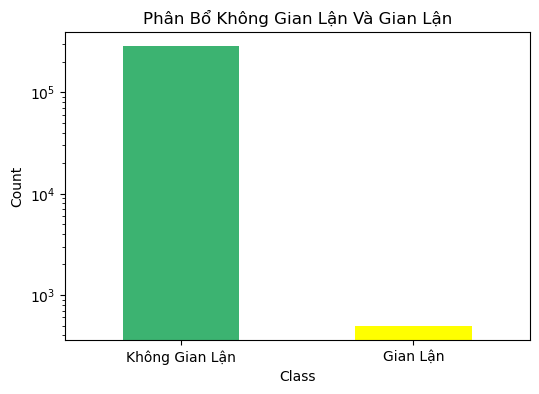

In [3]:
 # Trực quan hóa trường hợp gian lận và không gian lận
class_counts=df['Class'].value_counts()
print(class_counts)
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['mediumseagreen', 'yellow'])
plt.title('Phân Bổ Không Gian Lận Và Gian Lận')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')
plt.xticks(ticks=[0, 1], labels=['Không Gian Lận', 'Gian Lận'], rotation=0)
plt.show()

In [4]:
# Kiểm tra dữ liệu rỗng
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Kiểm tra dữ liệu trùng lặp
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [6]:
# Có những dòng dữ liệu chỉ trùng vài cột => không ảnh hưởng đến dữ liệu => Xóa những dòng dữ liệu giống nhau hoàn toàn
df.drop_duplicates(inplace=True)
# Kiểm tra lại 
df.duplicated().sum()

0

### Tiền xử lý 

In [7]:
# Các giao dịch gian lận và không gian lận sau khi xử lý dữ liệu
print(df['Class'].value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


In [8]:
# Chọn biến
X = df.drop('Class', axis=1)
y = df['Class']
# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=102)

In [9]:
print(y_train.value_counts())
y_train.count()

Class
0    198281
1       327
Name: count, dtype: int64


198608

In [10]:
# Cân bằng dữ liệu tập train bằng SMOTE (không bị mất nhiều dữ liệu như Underpling hay dễ bị overfit như Oversampling)
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_smote.value_counts()
print(df.shape,X_smote.shape)

(283726, 31) (396562, 30)


In [11]:
print(y_smote.value_counts())
y_smote.count()

Class
0    198281
1    198281
Name: count, dtype: int64


396562

In [19]:
# Lọc biến bằng Random Forest
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier()

# Huấn luyện mô hình trên dữ liệu
rf_model.fit(X, y)

# Đánh giá mức độ quan trọng của các biến
importance = rf_model.feature_importances_

# Tạo dataframe để hiển thị mức độ quan trọng của các biến
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# In ra mức độ quan trọng của các biến
print(feature_importance_df)

   Feature  Importance
17     V17    0.183084
14     V14    0.122063
12     V12    0.121535
10     V10    0.084176
16     V16    0.061504
11     V11    0.059916
9       V9    0.032020
4       V4    0.029290
7       V7    0.025663
18     V18    0.024220
26     V26    0.018652
21     V21    0.017586
3       V3    0.017496
1       V1    0.016530
2       V2    0.014905
8       V8    0.014251
0     Time    0.013476
27     V27    0.012727
20     V20    0.012707
6       V6    0.012489
22     V22    0.012185
15     V15    0.011874
19     V19    0.011721
28     V28    0.011632
5       V5    0.010785
13     V13    0.010681
29  Amount    0.010466
24     V24    0.009438
25     V25    0.009375
23     V23    0.007554


Do các biến đều có tầm quan trọng không quá lệch nhau => giữ nguyên các biến ban đầu

In [12]:
# Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_smote)
X_test = scaler.transform(X_test)

In [13]:
# Huấn luyện mô hình bằng Logictic Regrestion:
model = LogisticRegression()
model.fit(X_smote, y_smote)
model.coef_

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-3.56375570e-05,  1.58686435e-01,  5.52555510e-02,
        -9.41381914e-01,  7.71037883e-01,  2.13775571e-02,
        -2.52044289e-01, -4.03618249e-01, -7.05089944e-02,
        -3.82267649e-01, -7.10950303e-01,  3.86648058e-01,
        -7.33403436e-01, -1.67279334e-01, -1.23393007e+00,
        -1.08188580e-01, -4.28513847e-01, -7.41616368e-01,
        -1.50404712e-01,  6.85607527e-02,  1.11162233e-01,
         5.58759944e-02,  1.13800166e-01,  2.17474035e-02,
        -4.08359338e-03, -2.83855129e-02, -1.74949338e-02,
         3.47552194e-02,  2.39415304e-02, -1.01400945e-05]])

In [14]:
# Đánh giá kết quả mô hình
predictions_logic = model.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, predictions_logic))
print('F1_Score:', f1_score(y_test, predictions_logic))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions_logic))

Accuracy score: 0.9993773349937733
F1_Score: 0.8
Confusion matrix:
[[84959    13]
 [   40   106]]


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 427.9555555555555, 'Predicted label')

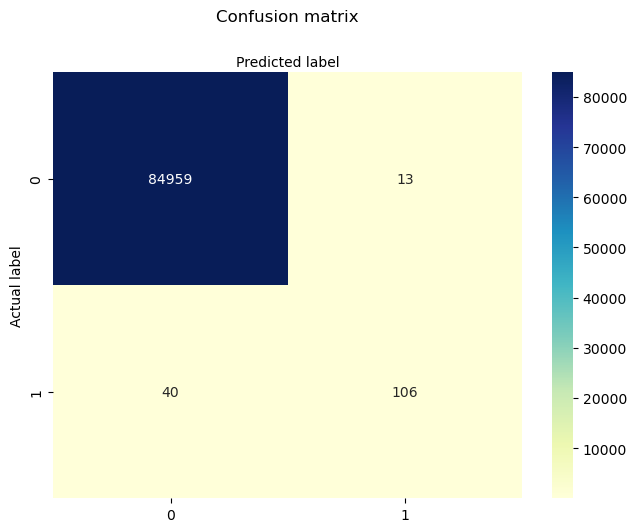

In [15]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(y_test, predictions_logic)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


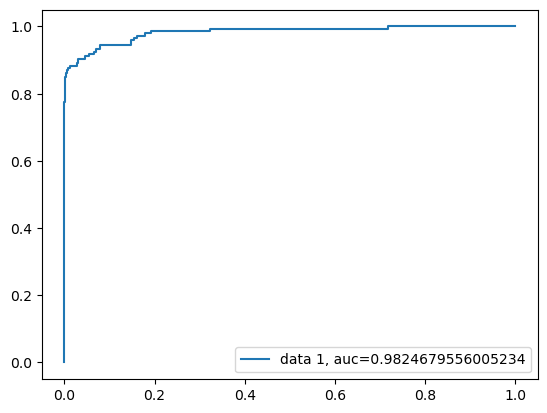

In [16]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [17]:
# Ngưỡng cắt 
thres = np.linspace(0.1, 0.9, 9)
scores = []

for i in thres:
    y_pred = (model.predict_proba(X_test)[:, 1] >= i).astype(int)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred)
    F1_Scrore = f1_score(y_test, y_pred)
    scores.append([i, recall, precision, F1_Scrore])

df = pd.DataFrame(scores, columns=['Threshold', 'Recall', 'precision','F1 score'])
print(df)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarnin

   Threshold    Recall  precision  F1 score
0        0.1  0.999154   0.728395  0.766234
1        0.2  0.999307   0.804196  0.795848
2        0.3  0.999389   0.861538  0.811594
3        0.4  0.999401   0.880000  0.811808
4        0.5  0.999377   0.890756  0.800000
5        0.6  0.999307   0.891892  0.770428
6        0.7  0.999272   0.903846  0.752000
7        0.8  0.999213   0.898990  0.726531
8        0.9  0.999095   0.887640  0.672340


=> ngưỡng cắt tốt nhất là 0.4

In [18]:
y_pred = ((model.predict_proba(X_test)[:, 1] >= 0.4)).astype(int)
y_pred

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])